<a href="https://colab.research.google.com/github/na0260/data-minig-lab/blob/main/KSA_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import numpy as np

iris_df = pd.read_csv('/content/Iris.csv')
penguin_df = pd.read_csv('/content/penguins.csv')

In [144]:
iris_df = iris_df.dropna()
penguin_df = penguin_df.dropna()
iris_features = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
penguin_features = penguin_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [145]:
from sklearn.preprocessing import StandardScaler

iris_scaler = StandardScaler()
iris_features_standardized = iris_scaler.fit_transform(iris_features)
penguin_scaler = StandardScaler()
penguin_features_standardized = penguin_scaler.fit_transform(penguin_features)

In [146]:
from sklearn.cluster import KMeans

kmeans_iris = KMeans(n_clusters=3, random_state=42)
kmeans_labels_iris = kmeans_iris.fit_predict(iris_features_standardized)
kmeans_penguin = KMeans(n_clusters=2, random_state=42)
kmeans_labels_penguin = kmeans_penguin.fit_predict(penguin_features_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [147]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering_iris = AgglomerativeClustering(n_clusters=3)
agg_labels_iris = agg_clustering_iris.fit_predict(iris_features_standardized)
agg_clustering_penguin = AgglomerativeClustering(n_clusters=2)
agg_labels_penguin = agg_clustering_penguin.fit_predict(penguin_features_standardized)

In [148]:
from sklearn.metrics import silhouette_score

silhouette_kmeans_iris = silhouette_score(iris_features_standardized, kmeans_labels_iris)
silhouette_agg_iris = silhouette_score(iris_features_standardized, agg_labels_iris)
silhouette_kmeans_penguin = silhouette_score(penguin_features_standardized, kmeans_labels_penguin)
silhouette_agg_penguin = silhouette_score(penguin_features_standardized, agg_labels_penguin)

print(f"Iris Dataset - Silhouette Score - K-Means: {silhouette_kmeans_iris}")
print(f"Iris Dataset - Silhouette Score - Hierarchical: {silhouette_agg_iris}")
print(f"Penguin Dataset - Silhouette Score - K-Means: {silhouette_kmeans_penguin}")
print(f"Penguin Dataset - Silhouette Score - Hierarchical: {silhouette_agg_penguin}")

Iris Dataset - Silhouette Score - K-Means: 0.4589717867018717
Iris Dataset - Silhouette Score - Hierarchical: 0.44553956399200406
Penguin Dataset - Silhouette Score - K-Means: 0.4829899080006381
Penguin Dataset - Silhouette Score - Hierarchical: 0.4815156091312094


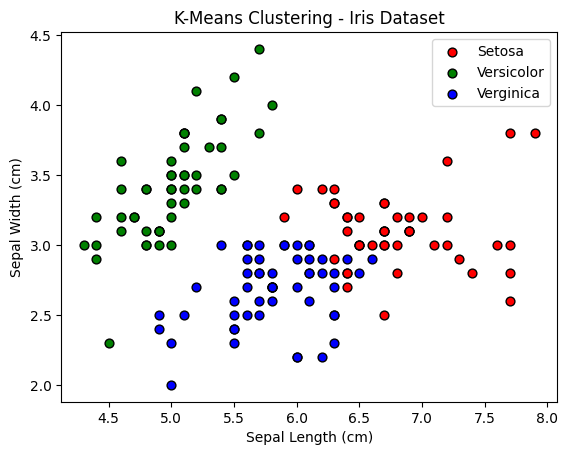

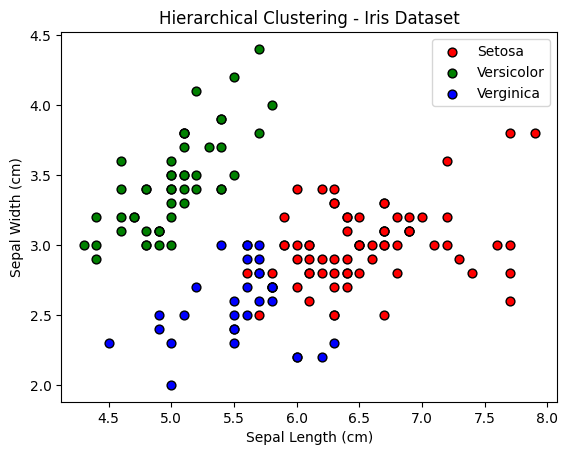

In [149]:
import matplotlib.pyplot as plt

setosa_data = iris_features[kmeans_labels_iris == 0]
versicolor_data = iris_features[kmeans_labels_iris == 1]
verginica_data = iris_features[kmeans_labels_iris == 2]

plt.scatter(setosa_data['SepalLengthCm'], setosa_data['SepalWidthCm'], c='red', edgecolor='k', s=40, label='Setosa')
plt.scatter(versicolor_data['SepalLengthCm'], versicolor_data['SepalWidthCm'], c='green', edgecolor='k', s=40, label='Versicolor')
plt.scatter(verginica_data['SepalLengthCm'], verginica_data['SepalWidthCm'], c='blue', edgecolor='k', s=40, label='Verginica')

plt.title('K-Means Clustering - Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

setosa_data = iris_features[agg_labels_iris == 0]
versicolor_data = iris_features[agg_labels_iris == 1]
verginica_data = iris_features[agg_labels_iris == 2]

plt.scatter(setosa_data['SepalLengthCm'], setosa_data['SepalWidthCm'], c='red', edgecolor='k', s=40, label='Setosa')
plt.scatter(versicolor_data['SepalLengthCm'], versicolor_data['SepalWidthCm'], c='green', edgecolor='k', s=40, label='Versicolor')
plt.scatter(verginica_data['SepalLengthCm'], verginica_data['SepalWidthCm'], c='blue', edgecolor='k', s=40, label='Verginica')

plt.title('Hierarchical Clustering - Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

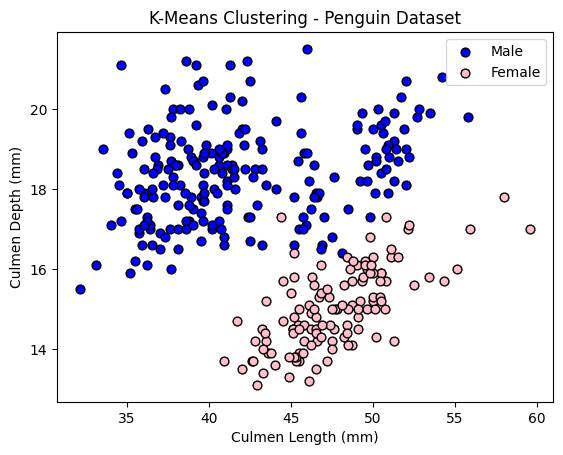

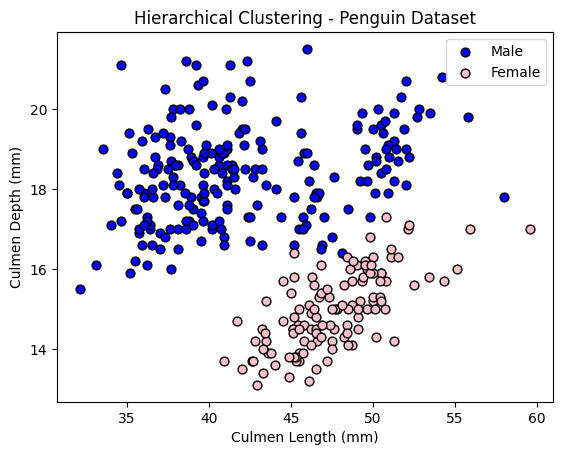

In [150]:
male_data = penguin_features[kmeans_labels_penguin == 0]
female_data = penguin_features[kmeans_labels_penguin == 1]

plt.scatter(male_data['culmen_length_mm'], male_data['culmen_depth_mm'], c='blue', edgecolor='k', s=40, label='Male')
plt.scatter(female_data['culmen_length_mm'], female_data['culmen_depth_mm'], c='pink', edgecolor='k', s=40, label='Female')

plt.title('K-Means Clustering - Penguin Dataset')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend()
plt.show()

male_data = penguin_features[agg_labels_penguin == 0]
female_data = penguin_features[agg_labels_penguin == 1]

plt.scatter(male_data['culmen_length_mm'], male_data['culmen_depth_mm'], c='blue', edgecolor='k', s=40, label='Male')
plt.scatter(female_data['culmen_length_mm'], female_data['culmen_depth_mm'], c='pink', edgecolor='k', s=40, label='Female')

plt.title('Hierarchical Clustering - Penguin Dataset')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend()
plt.show()

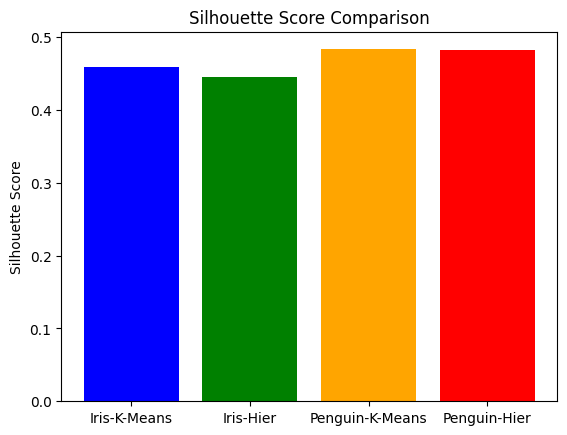

In [151]:
labels = ['Iris-K-Means', 'Iris-Hier', 'Penguin-K-Means', 'Penguin-Hier']
scores = [silhouette_kmeans_iris, silhouette_agg_iris, silhouette_kmeans_penguin, silhouette_agg_penguin]

plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison')
plt.show()